1. 下載資料

In [1]:
import time
import SpeechDownloader

t0= time.time()

gscInfo, nCategs= SpeechDownloader.PrepareGoogleSpeechCmd(
        version= 2, 
        task= '35word')

dt= time.time()-t0
print('SpeechDownloader.PrepareGoogleSpeechCmd(), dt(sec)= {}'.format(dt))

print('gscInfo.keys()= {}, nCategs= {}'.format(gscInfo.keys(), nCategs))


Google Speech commands dataset version 2 already exists. Skipping download.
Converting test set WAVs to numpy files


0it [00:00, ?it/s]


Converting training set WAVs to numpy files


0it [00:00, ?it/s]


Done preparing Google Speech commands dataset version 2
SpeechDownloader.PrepareGoogleSpeechCmd(), dt(sec)= 1.4956743717193604
gscInfo.keys()= dict_keys(['train', 'test', 'val', 'testREAL']), nCategs= 36


2. 觀賞資料

![dataDir.png](./dataDir.png)

![dataFile.png](./dataFile.png)



3. 資料劃分： 
    在 train 資料夾之下，
    先分為 validation_list, test_list, 
    其他才做為 train_list

validation_list.txt=[
- right/a69b9b3e_nohash_0.wav
- right/439c84f4_nohash_1.wav
- right/409c962a_nohash_1.wav
- right/dbaf8fc6_nohash_2.wav
- right/a6d586b7_nohash_1.wav
- right/0e17f595_nohash_1.wav
- right/ff2b842e_nohash_3.wav
- right/7fd25f7c_nohash_2.wav
- right/3cc595de_nohash_4.wav
- right/591d32f3_nohash_0.wav
- :
- :
]

testing_list.txt=[
- right/bb05582b_nohash_3.wav
- right/97f4c236_nohash_2.wav
- right/f2e59fea_nohash_3.wav
- right/fdb5155e_nohash_2.wav
- right/dc75148d_nohash_0.wav
- right/3f170018_nohash_0.wav
- right/18f8afd5_nohash_3.wav
- right/e1469561_nohash_1.wav
- right/5c8af87a_nohash_0.wav
- right/aa48c94a_nohash_0.wav
- :
- :
]


In [ ]:
type(gscInfo)  # dict
gscInfo.keys() # dict_keys(['train', 'test', 'val', 'testREAL'])
type(gscInfo['train']) # dic
gscInfo['train'].keys() # dict_keys(['files', 'labels'])
type(gscInfo['train']['files']) # list
len(gscInfo['train']['files']) # 84849

gscInfo['train']['files'][0:10]
'''
['sd_GSCmdV2/train/up/9a8d8d34_nohash_0.wav.npy',
 'sd_GSCmdV2/train/stop/62605293_nohash_0.wav.npy',
 'sd_GSCmdV2/train/off/a1cff772_nohash_1.wav.npy',
 'sd_GSCmdV2/train/three/5b09db89_nohash_2.wav.npy',
 'sd_GSCmdV2/train/bird/50d1c8e3_nohash_2.wav.npy',
 'sd_GSCmdV2/train/two/5ab63b0a_nohash_0.wav.npy',
 'sd_GSCmdV2/train/marvin/bfaf2000_nohash_1.wav.npy',
 'sd_GSCmdV2/train/six/a04817c2_nohash_1.wav.npy',
 'sd_GSCmdV2/train/eight/69953f48_nohash_0.wav.npy',
 'sd_GSCmdV2/train/one/dcbfe008_nohash_0.wav.npy']
'''

gscInfo['train']['labels']
'''
{'sd_GSCmdV2/train/up/9a8d8d34_nohash_0.wav.npy': 4,
 'sd_GSCmdV2/train/stop/62605293_nohash_0.wav.npy': 10,
 'sd_GSCmdV2/train/off/a1cff772_nohash_1.wav.npy': 9,
 'sd_GSCmdV2/train/three/5b09db89_nohash_2.wav.npy': 15,
 'sd_GSCmdV2/train/bird/50d1c8e3_nohash_2.wav.npy': 23,
 'sd_GSCmdV2/train/two/5ab63b0a_nohash_0.wav.npy': 14,
 'sd_GSCmdV2/train/marvin/bfaf2000_nohash_1.wav.npy': 31,
 'sd_GSCmdV2/train/six/a04817c2_nohash_1.wav.npy': 18,
 'sd_GSCmdV2/train/eight/69953f48_nohash_0.wav.npy': 20,
 'sd_GSCmdV2/train/one/dcbfe008_nohash_0.wav.npy': 13,
 :
 :
'''

In [ ]:
for s in gscInfo.keys(): 
    for t in gscInfo[s].keys():
        a= '{}, {}, len= {} '.format(s,t,len(gscInfo[s][t]))
        print(a)
_='''
train, files, len= 84849 
train, labels, len= 84849 
test, files, len= 11005 
test, labels, len= 11005 
val, files, len= 9981 
val, labels, len= 9981 
testREAL, files, len= 4890 
testREAL, labels, len= 4890 
110725
'''
# 84849+11005+9981+4890==110725        

In [ ]:
gscInfo

_= '''
{'train': {'files': ['sd_GSCmdV2/train/up/9a8d8d34_nohash_0.wav.npy',
   'sd_GSCmdV2/train/stop/62605293_nohash_0.wav.npy',
   'sd_GSCmdV2/train/off/a1cff772_nohash_1.wav.npy',
   'sd_GSCmdV2/train/three/5b09db89_nohash_2.wav.npy',
   'sd_GSCmdV2/train/bird/50d1c8e3_nohash_2.wav.npy',
   'sd_GSCmdV2/train/two/5ab63b0a_nohash_0.wav.npy',
   'sd_GSCmdV2/train/marvin/bfaf2000_nohash_1.wav.npy',
   :
   :
'''

In [42]:
import numpy as np
import pylab as pl

x0= np.load('sd_GSCmdV2/train/up/9a8d8d34_nohash_0.wav.npy')

fn= gscInfo['train']['files'][1]
x1= np.load(fn)

fn= gscInfo['train']['files'][-1]
x2= np.load(fn)

((16000,),
 dtype('float32'),
 [<matplotlib.lines.Line2D at 0x231ecd2e308>])

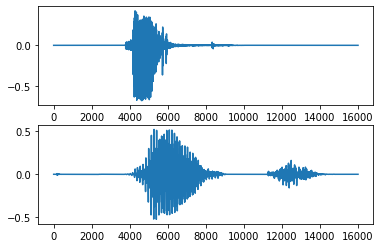

In [54]:
x0.shape, x0.dtype, pl.subplot(2,1,1), pl.plot(x0)
x2.shape, x2.dtype, pl.subplot(2,1,2), pl.plot(x2)

In [55]:
import sounddevice as sd

sd.play(x0, samplerate=16000)
sd.wait()
sd.play(x2, samplerate=16000)
sd.wait()


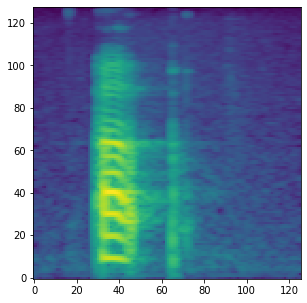

In [70]:
import librosa

X= librosa.feature.melspectrogram(
    x0, 
    sr=       16000, 
    n_fft=     1024, 
    hop_length= 128)

X= np.log(X)

pl.figure(figsize=(5,5))
pl.imshow(X, origin= 'low')

In [ ]:
# load all data into memory
# 有些檔案長度不為 1 sec，要 normalize 成 1 sec= 16000


def ryLengthNormalize(x, length=16000):
    #curX could be bigger or smaller than self.dim
    if len(x) == length:
        X= x
        #print('Same dim')
    elif len(x) > length: #bigger
        #we can choose any position in curX-self.dim
        randPos= np.random.randint(len(x)-length)
        X= x[randPos:randPos+length]
        #print('File dim bigger')
    else: #smaller
        randPos= np.random.randint(length-len(x))
        
        X= np.random.random(length)*1e-10
        
        X[randPos:randPos+len(x)]= x
        #print('File dim smaller')
    return X
    
    



from tqdm import tqdm
import time

t0= time.time()

xT= []
for s in tqdm(['testREAL', 'test', 'val', 'train']):
    xL=[]
    yL=[]
    for fn in tqdm(gscInfo[s]['files']):

        x= np.load(fn)
        
        x= ryLengthNormalize(x)
        
        
        y= gscInfo[s]['labels'][fn]
        xL+= [x]
        yL+= [y]
    xA= np.vstack(xL)
    yA= np.array(yL)

    xT+= [(xA, yA)]

[(x_testREAL, y_testREAL),
(x_test, y_test),
(x_val, y_val),
(x_train, y_train)]= xT

dt= time.time()-t0

print('load all data into memory ... dt(sec)= {}'.format(dt))

# load all data into memory ... dt(sec)= 776 

In [79]:
#########################
# ry Add silence in Train
#########################
import os
import numpy as np

allFiles= gscInfo['train']['files']
def ryAddSilenceInTrain(allFiles):
    
    noiseL= [np.load(f) for f in allFiles  if '_background_noise_' in f]
       
    n=0
    silenceL= []
    for x in noiseL:
        t=0
        while (t+1)*16000 < x.size:
            x1sec= x[t*16000:(t+1)*16000]
            silenceL += [x1sec]
            t+=1
        n+=1

    return silenceL
        
silenceL= ryAddSilenceInTrain(allFiles)

x_silence= np.vstack(silenceL)
y_silence= np.zeros(len(silenceL)).astype(np.int)

x_train= np.vstack([x_train, x_silence])
y_train= np.concatenate([y_train, y_silence])


In [ ]:
### 壓縮檔案存出去，下次使用時可以節省時間

In [81]:
# In[]
t0= time.time()
import os

fn= 'ryGsc_sil1.npz'
#if not os.path.isfile(fn):
np.savez_compressed(
    fn, 
    x_test=     x_test, 
    y_test=     y_test,
    x_testREAL= x_testREAL,
    y_testREAL= y_testREAL,
    x_train=    x_train, 
    y_train=    y_train,
    x_val=      x_val,
    y_val=      y_val
    )

dt= time.time()-t0
print('np.savez_compressed(), dt(sec)= {}'.format(dt))
# np.savez_compressed(), dt(sec)= 779
# np.savez_compressed(), dt(sec)= 767

np.savez_compressed(), dt(sec)= 766.870103597641


In [83]:

nByte = os.path.getsize(fn)
nByte
# 3,633,104,975

3633104975